## DATA PROCESSING

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
import os

%matplotlib inline

## Question 1 - Way A

In [2]:
data = pd.read_csv("data_p/1/quick.txt")
data

,N,TIME_MEAN,COMP_MEAN,ERR_MEAN,TIME_SD,COMP_SD,ERR_SD
0,2,0.000015,1.000000,0.0,0.000001,0.000000,0.0
1,4,0.000021,4.800971,0.0,0.000002,0.891258,0.0
2,8,0.000033,16.864078,0.0,0.000005,3.066892,0.0
3,16,0.000062,50.067961,0.0,0.000006,6.978381,0.0
4,32,0.000134,138.451456,0.0,0.000014,16.864888,0.0
5,64,0.000313,362.830097,0.0,0.000034,41.451768,0.0
6,128,0.000721,890.150485,0.0,0.000055,73.813025,0.0
7,256,0.001685,2149.597087,0.0,0.000158,178.148959,0.0
8,512,0.003855,4946.184466,0.0,0.000296,335.189622,0.0
9,1024,0.008913,11351.203883,0.0,0.000570,637.601257,0.0


Text(0.5,1,'QUICKSORT')

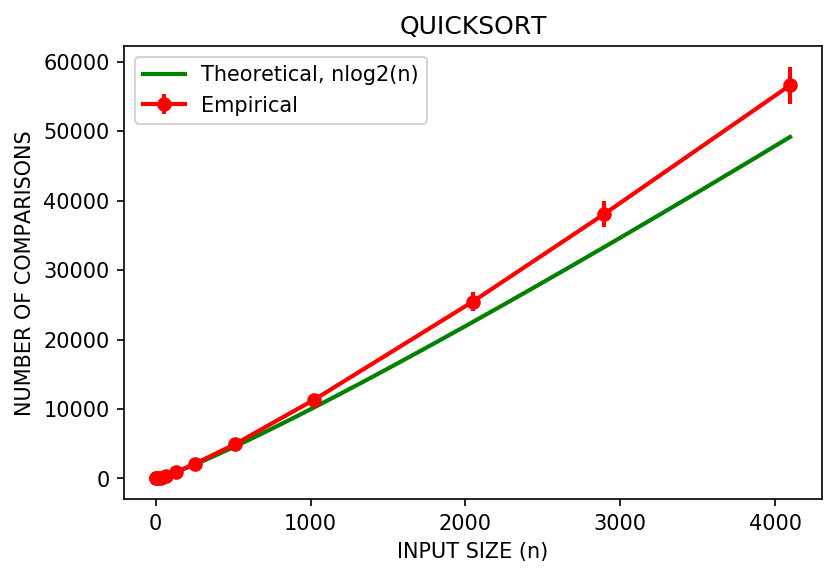

In [21]:
#rcParams['figure.dpi'] = 150

nn = np.array([i for i in range(2, 4097)])
nlogn = np.array([(i)*np.log2(i) for i in nn])

_, ax = plt.subplots()
ax.plot(nn[:], nlogn[:], lw=2, label="Theoretical, nlog2(n)", color="green")
ax.errorbar(data["N"][:], data["COMP_MEAN"][:], yerr=data["COMP_SD"][:], lw=2, fmt="-o", label="Empirical", color="red")
ax.legend(loc="upper left")
ax.set_xlabel("INPUT SIZE (n)")
ax.set_ylabel("NUMBER OF COMPARISONS")
ax.set_title("QUICKSORT")

In [71]:
pvalues = pd.read_csv("data_p/q1.txt", names = ["input_size", "p.values"])
#print(pvalues.to_latex(index=False))
pvalues

,input_size,p.values
0,4,1.424627e-119
1,8,3.701857e-85
2,16,6.323079e-74
3,32,2.105577e-45
4,64,2.606640e-12
5,128,1.283454e-01
6,256,1.000000e+00
7,512,1.000000e+00
8,1024,1.000000e+00
9,2048,1.000000e+00


## Question2

In [5]:
# p-value on R notebook

In [69]:
dataq = pd.read_csv("data_p/1/quick.txt")
dataq

,N,TIME_MEAN,COMP_MEAN,ERR_MEAN,TIME_SD,COMP_SD,ERR_SD
0,2,0.000015,1.000000,0.0,0.000001,0.000000,0.0
1,4,0.000021,4.800971,0.0,0.000002,0.891258,0.0
2,8,0.000033,16.864078,0.0,0.000005,3.066892,0.0
3,16,0.000062,50.067961,0.0,0.000006,6.978381,0.0
4,32,0.000134,138.451456,0.0,0.000014,16.864888,0.0
5,64,0.000313,362.830097,0.0,0.000034,41.451768,0.0
6,128,0.000721,890.150485,0.0,0.000055,73.813025,0.0
7,256,0.001685,2149.597087,0.0,0.000158,178.148959,0.0
8,512,0.003855,4946.184466,0.0,0.000296,335.189622,0.0
9,1024,0.008913,11351.203883,0.0,0.000570,637.601257,0.0


In [70]:
datab = pd.read_csv("data_p/1/bubble.txt")
datab

,N,TIME_MEAN,COMP_MEAN,ERR_MEAN,TIME_SD,COMP_SD,ERR_SD
0,2,0.000013,1.0,0.0,0.000003,0.0,0.0
1,4,0.000019,6.0,0.0,0.000003,0.0,0.0
2,8,0.000038,28.0,0.0,0.000003,0.0,0.0
3,16,0.000115,120.0,0.0,0.000009,0.0,0.0
4,32,0.000422,496.0,0.0,0.000025,0.0,0.0
5,64,0.001653,2016.0,0.0,0.000060,0.0,0.0
6,128,0.006573,8128.0,0.0,0.000226,0.0,0.0
7,256,0.026333,32640.0,0.0,0.000843,0.0,0.0
8,512,0.107575,130816.0,0.0,0.005967,0.0,0.0
9,1024,0.428615,523776.0,0.0,0.021195,0.0,0.0


Text(0.5,1,'BUBBLE vs QUICK')

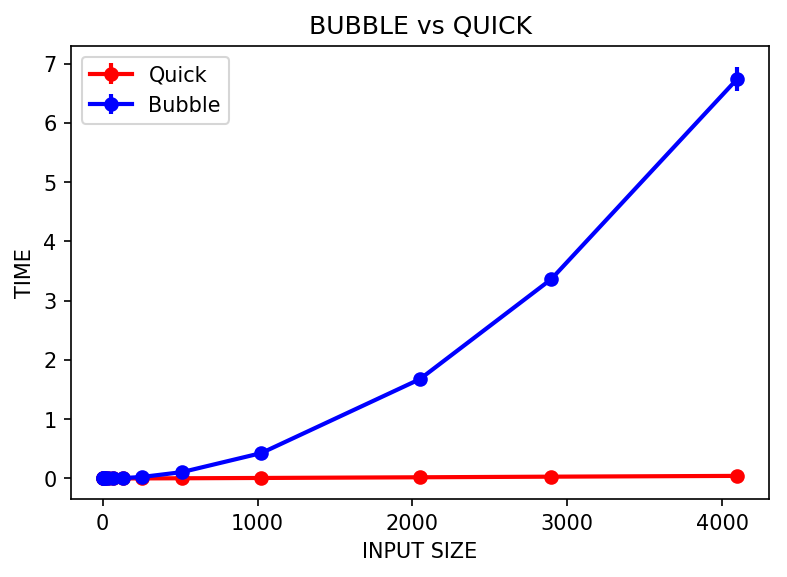

In [72]:
#rcParams['figure.dpi'] = 150

_, ax = plt.subplots()
ax.errorbar(dataq["N"], dataq["TIME_MEAN"], yerr=dataq["TIME_SD"], lw=2, fmt="-o", label="Quick", color="red")
ax.errorbar(datab["N"], datab["TIME_MEAN"], yerr=datab["TIME_SD"], lw=2, fmt="-o", label="Bubble", color="blue")
ax.legend(loc="upper left")
ax.set_xlabel("INPUT SIZE")
ax.set_ylabel("TIME")
ax.set_title("BUBBLE vs QUICK")

Text(0.5,1,'QUICK')

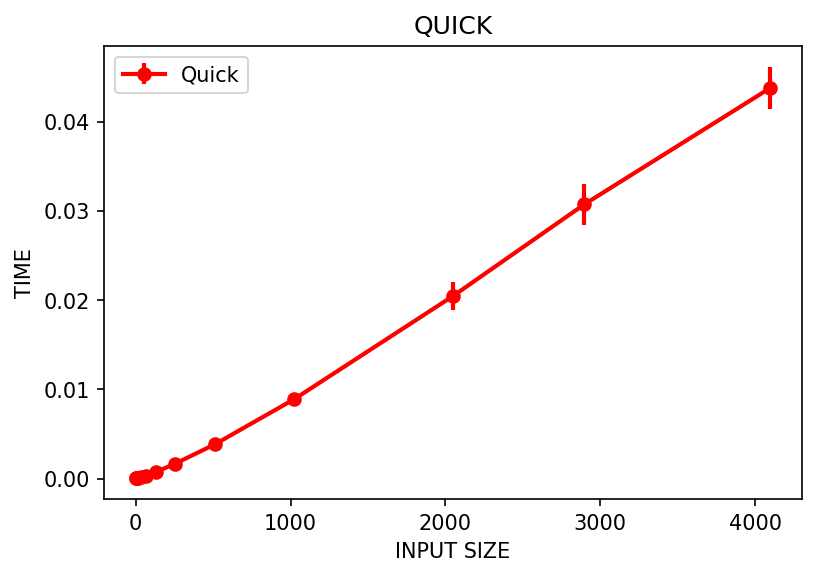

In [73]:
_, ax = plt.subplots()
ax.errorbar(dataq["N"], dataq["TIME_MEAN"], yerr=dataq["TIME_SD"], lw=2, fmt="-o", label="Quick", color="red")
#ax.errorbar(datab["N"], datab["TIME"], yerr=datab["TIME_SD"], lw=2, fmt="-o", label="Bubble", color="blue")
ax.legend(loc="upper left")
ax.set_xlabel("INPUT SIZE")
ax.set_ylabel("TIME")
ax.set_title("QUICK")

Text(0.5,1,'BUBBLE')

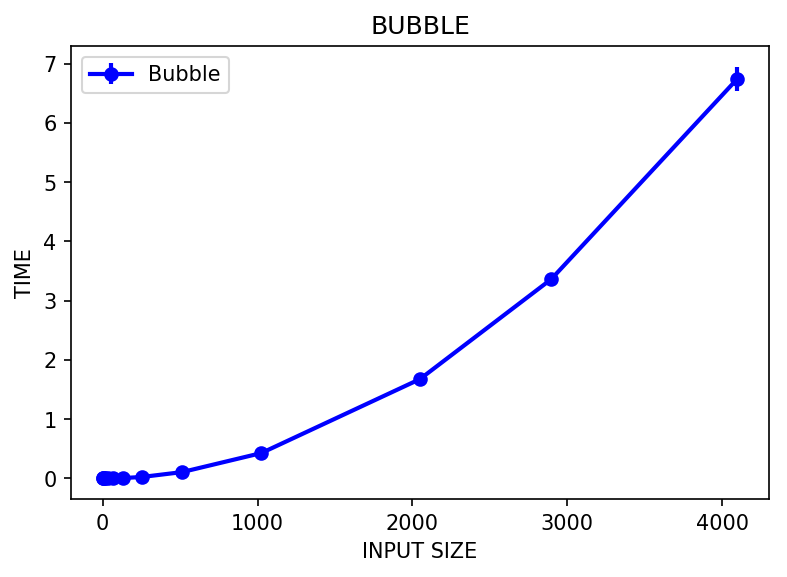

In [74]:
_, ax = plt.subplots()
#ax.errorbar(dataq["N"], dataq["TIME"], yerr=dataq["TIME_SD"], lw=2, fmt="-o", label="Quick", color="red")
ax.errorbar(datab["N"], datab["TIME_MEAN"], yerr=datab["TIME_SD"], lw=2, fmt="-o", label="Bubble", color="blue")
ax.legend(loc="upper left")
ax.set_xlabel("INPUT SIZE")
ax.set_ylabel("TIME")
ax.set_title("BUBBLE")

## Question 3

In [6]:
datab50 = pd.read_csv("data_p/0.5/bubble.txt")
datab25 = pd.read_csv("data_p/0.25/bubble.txt")
datab75 = pd.read_csv("data_p/0.75/bubble.txt")

dataq50 = pd.read_csv("data_p/0.5/quick.txt")
dataq25 = pd.read_csv("data_p/0.25/quick.txt")
dataq75 = pd.read_csv("data_p/0.75/quick.txt")

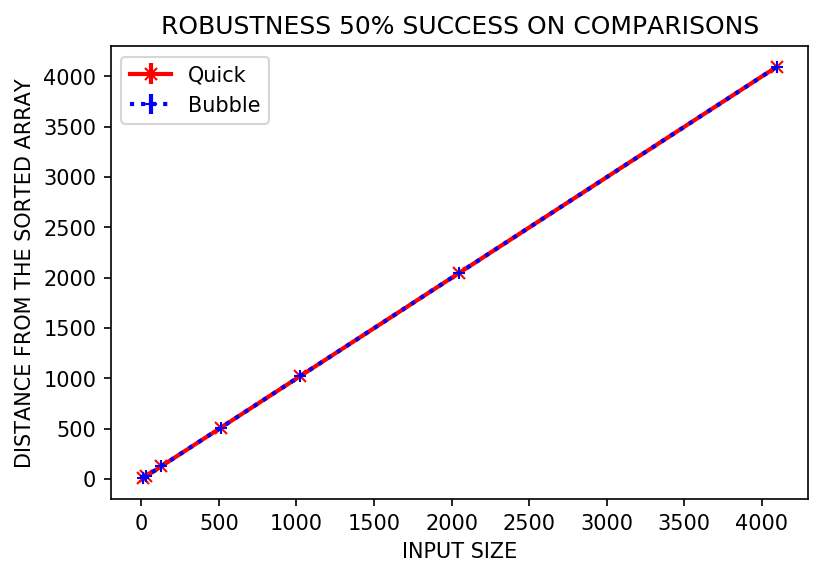

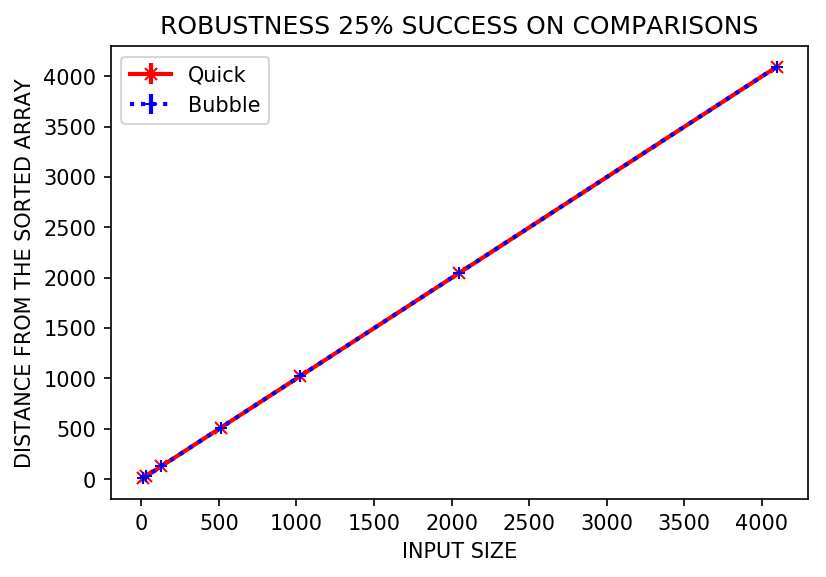

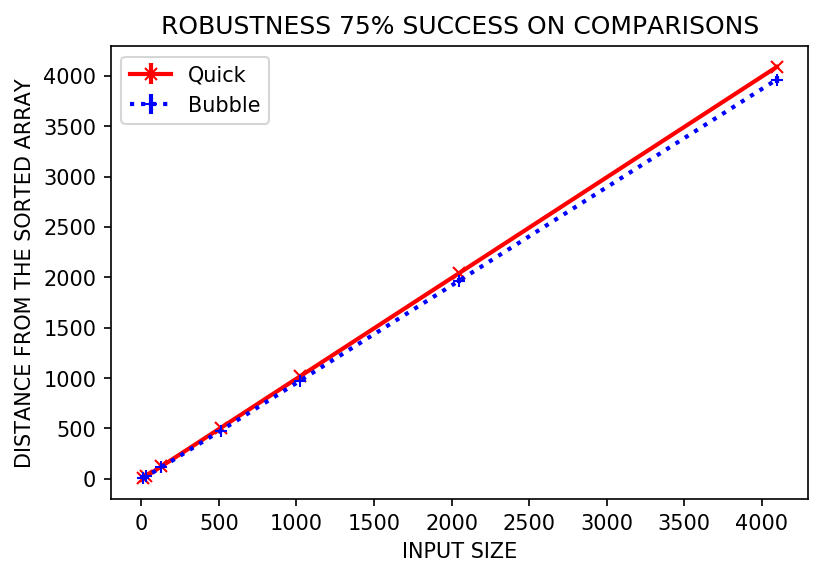

In [18]:
#rcParams['figure.dpi'] = 150

t = ["50%", "25%", "75%"]
q = [dataq50, dataq25, dataq75]
b = [datab50, datab25, datab75]

for i in range(3):
    
    dataq = q[i]
    datab = b[i]

    _, ax = plt.subplots()
    ax.errorbar(dataq["N"], dataq["ERR_MEAN"], yerr=dataq["ERR_SD"], lw=2, fmt="-x", label="Quick", color="red", ls="-")
    ax.errorbar(datab["N"], datab["ERR_MEAN"], yerr=datab["ERR_SD"], lw=2, fmt="-+", label="Bubble", color="blue", ls=":")

    ax.legend(loc="upper left")
    ax.set_xlabel("INPUT SIZE")
    ax.set_ylabel("DISTANCE FROM THE SORTED ARRAY")
    ax.set_title("ROBUSTNESS "+t[i]+" SUCCESS ON COMPARISONS")